# Problem 3.1

In [376]:
import pandas as pd
import numpy as np
import numpy as absolute
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy import arange
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import RepeatedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
#from numpy import mean
#from numpy import std
#from numpy import mean
#from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import bias_variance_decomp
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'sklearn.metrics.scorer'

In [377]:
df = pd.read_csv('cereal.csv', sep=';')

In [378]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


In [379]:
df.drop(df.index[0], inplace = True)

 df.head()

In [386]:

##df.info()

df["sodium2"] = df["sodium"].astype(int)
df["sodium2"] = df["sodium2"].mul(2) 
df["sodium2"] = df["sodium2"] + random.randint(0,5)
df.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,sodium2
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973,261
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679,31
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505,521
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912,281
5,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843,401


In [387]:
X = df[['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups','sodium2']]
y = df[['rating']]

In [388]:
X

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,sodium2
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,261
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,31
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,521
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,281
5,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75,501
74,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1,281
75,Wheat Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67,461
76,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1,401


In [389]:
labels, levels = pd.factorize(X['name'])
X['name']=labels

In [390]:
X

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,sodium2
1,0,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,261
2,1,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,31
3,2,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,521
4,3,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,281
5,4,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,72,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75,501
74,73,G,C,110,1,1,140,0,13,12,25,25,2,1,1,281
75,74,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67,461
76,75,G,C,100,3,1,200,3,17,3,110,25,1,1,1,401


In [391]:
X

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,sodium2
1,0,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,261
2,1,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,31
3,2,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,521
4,3,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,281
5,4,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,72,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75,501
74,73,G,C,110,1,1,140,0,13,12,25,25,2,1,1,281
75,74,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67,461
76,75,G,C,100,3,1,200,3,17,3,110,25,1,1,1,401


In [392]:
X = X.astype({"calories":"int","protein":"int","fat":"int","sodium":"int","fiber":"float","carbo":"float","sugars":"int","potass":"int","vitamins":"int","shelf":"int","weight":"float","cups":"float","sodium":"int"})




In [393]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     int64  
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int32  
 4   protein   77 non-null     int32  
 5   fat       77 non-null     int32  
 6   sodium    77 non-null     int32  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int32  
 10  potass    77 non-null     int32  
 11  vitamins  77 non-null     int32  
 12  shelf     77 non-null     int32  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  sodium2   77 non-null     int32  
dtypes: float64(4), int32(9), int64(1), object(2)
memory usage: 7.5+ KB


In [394]:
X=pd.get_dummies(X,drop_first=True)
X

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,weight,cups,sodium2,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
1,0,70,4,1,130,10.0,5.0,6,280,25,...,1.0,0.33,261,0,0,1,0,0,0,0
2,1,120,3,5,15,2.0,8.0,8,135,0,...,1.0,1.00,31,0,0,0,0,1,0,0
3,2,70,4,1,260,9.0,7.0,5,320,25,...,1.0,0.33,521,0,1,0,0,0,0,0
4,3,50,4,0,140,14.0,8.0,0,330,25,...,1.0,0.50,281,0,1,0,0,0,0,0
5,4,110,2,2,200,1.0,14.0,8,-1,25,...,1.0,0.75,401,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,72,110,2,1,250,0.0,21.0,3,60,25,...,1.0,0.75,501,1,0,0,0,0,0,0
74,73,110,1,1,140,0.0,13.0,12,25,25,...,1.0,1.00,281,1,0,0,0,0,0,0
75,74,100,3,1,230,3.0,17.0,3,115,25,...,1.0,0.67,461,0,0,0,0,0,1,0
76,75,100,3,1,200,3.0,17.0,3,110,25,...,1.0,1.00,401,1,0,0,0,0,0,0


In [395]:
y

,rating
1,68.402973
2,33.983679
3,59.425505
4,93.704912
5,34.384843
...,...
73,39.106174
74,27.753301
75,49.787445
76,51.592193


In [396]:
from sklearn.preprocessing import scale
x_scaled=scale(X)

In [397]:
x_scaled.shape

(77, 21)

In [398]:
 param = {
     'alpha':[.00001, 0.0001,0.001, 0.01],
    'fit_intercept':[True,False],
     'normalize':[True,False],
     'positive':[True,False],
     'selection':['cyclic','random'],
     }

In [399]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [400]:
linear=LinearRegression()
linear.fit(x_train,y_train)
linear_pred=linear.predict(x_test)
linear_pred

array([[34.38484335],
       [21.87129195],
       [18.04285045],
       [68.40297277],
       [34.13976423],
       [40.10596494],
       [31.23005451],
       [41.5035402 ],
       [59.64283687],
       [41.01549166],
       [59.36399369],
       [49.7874452 ],
       [22.3965128 ],
       [19.82357261],
       [39.25919732],
       [53.37100723],
       [53.31381301],
       [29.50954055],
       [45.81171606],
       [36.17619608],
       [35.25244409],
       [39.24111441],
       [36.47151199],
       [45.86332458]])

In [401]:
print(r2_score(y_test, linear_pred))

0.9999999999999992


In [402]:
lasso=Lasso(alpha=0.1,normalize=True)
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
lasso_pred

array([34.22963412, 26.61699825, 23.03403944, 69.53744249, 33.14419542,
       41.26076015, 30.06511378, 43.62322123, 56.28095834, 40.50141708,
       59.11773481, 49.50432419, 25.62172048, 25.18211929, 39.54172376,
       52.56712097, 54.03101099, 31.95807974, 46.49020351, 37.65905414,
       32.26876104, 39.88554089, 36.68747657, 46.00453737])

In [403]:
print(r2_score(y_test, lasso_pred))

0.967608468367838


In [404]:
variances = df.var()
print(variances)

sodium2    28111.414901
dtype: float64


In [405]:
ridge=Ridge(alpha=0.1,normalize=True)
result = ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
ridge_pred

array([[32.52339108],
       [22.80441868],
       [20.06683515],
       [70.3701374 ],
       [34.8970093 ],
       [39.66464031],
       [30.5614666 ],
       [42.67227969],
       [57.93800955],
       [41.80398074],
       [59.9537954 ],
       [48.61322894],
       [24.80295711],
       [21.63252566],
       [40.91712669],
       [52.18027192],
       [54.68433618],
       [29.85064208],
       [44.31272733],
       [37.66253216],
       [34.35797204],
       [39.085261  ],
       [36.07049268],
       [45.99732863]])

In [406]:
print(r2_score(y_test, ridge_pred))

0.9895901617902335


In [407]:
e_net = ElasticNet()
e_net.fit(x_train, y_train)

ElasticNet()

In [408]:
e_net.predict(x_test)

array([35.288642  , 29.19121944, 26.95454957, 68.76131082, 35.76110578,
       40.49007155, 33.88015556, 43.40357399, 53.81918399, 41.2056749 ,
       58.85125536, 48.42402104, 28.85329562, 26.81480393, 41.23186829,
       49.67726106, 52.78833627, 33.16429892, 44.5041593 , 38.76600544,
       36.6886976 , 38.72383122, 36.29814651, 44.74672961])

In [409]:
e_net.predict(x_train)

array([67.37563941, 58.13010574, 29.93583922, 34.95799746, 41.44897804,
       37.27437958, 30.44446254, 38.32356957, 36.43734218, 43.16451205,
       68.66875705, 34.50536582, 31.30061643, 40.31847442, 60.91124217,
       78.68085669, 36.36188715, 39.71913087, 47.30071672, 42.07892243,
       35.10679996, 35.08263783, 32.46007085, 48.1913778 , 31.29428689,
       47.36306774, 41.55432579, 41.72703935, 45.51360295, 51.96281941,
       34.45801257, 34.40496893, 52.25393192, 38.97901031, 55.73386905,
       47.51210316, 48.13826798, 39.30093729, 41.46001942, 66.15446049,
       50.16579032, 33.83444223, 32.27291557, 38.28147823, 40.47224516,
       44.29062379, 60.09480744, 44.87514359, 59.66880678, 51.68325677,
       45.80067022, 28.70231293, 33.14538572])

In [410]:
y_pred = e_net.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3.6354007905032653

In [411]:
r2_score(y_test, y_pred)

0.9191150197556969

# 3.2

In [412]:
from sklearn.pipeline import Pipeline

ridge_model = GridSearchCV(Ridge(),{'alpha':[0.0001,0.0005,0.005,0.001,0.01,0.05,0.1,0.2,0.5,1]},
                         cv=5, scoring='r2')

In [413]:
ridge_model.fit(X,y)
df_score = pd.DataFrame(ridge_model.cv_results_).iloc[:,4:][['param_alpha','mean_test_score']]

Text(0, 0.5, 'R2')

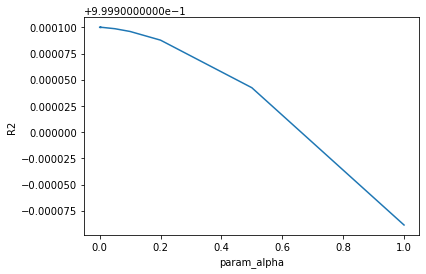

In [414]:
plt.plot(df_score['param_alpha'],df_score['mean_test_score'])
plt.xlabel("param_alpha")
plt.ylabel("R2")

# 3.3


In [415]:
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

NameError: name 'bias_variance_decomp' is not defined

In [375]:
ridge_mse, ridge_bias, ridge_var = bias_variance_decomp(model_ridge, x_train.values, y_train.values, x_test.values, y_test.values, loss='mse', random_seed=123)
ridge_y_pred=model_ridge.predict(_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % ridge_mse)
print('Avg Bias: %.3f' % ridge_bias)
print('Avg Variance: %.3f' % ridge_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,ridge_y_pred))

NameError: name 'bias_variance_decomp' is not defined

In [349]:
#print('Average expected loss: %.3f' % mse)
print('Average bias: %.3f' % bias)
print('Average variance: %.3f' % var)

NameError: name 'bias' is not defined

In [350]:
from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1,shuffle=True)
 y_train = y_train.values.reshape(len(y_train),)
 y_test = y_test.values.reshape(len(y_test),)
 ridge_model = Ridge()
 model = ridge_model.fit(X_train,y_train)
 mse, bias, var = bias_variance_decomp(model, x_train.values, y_train, x_test.values, y_test, loss='mse', num_rounds=200, random_seed=123)

IndentationError: unexpected indent (Temp/ipykernel_62932/3744149112.py, line 2)

In [ ]:
print('Average expected loss: %.3f' % mse)
print('Average bias: %.3f' % bias)
print('Average variance: %.3f' % var)

In [311]:
mse, bias, var = bias_variance_decomp(linear_model, X_train.values, y_train, X_test.values, y_test, loss='mse', num_rounds=200, random_seed=123)


NameError: name 'bias_variance_decomp' is not defined

In [221]:
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.122 (0.047)


In [210]:
plt(ridge.fit,xvar="lambda",label = "")


TypeError: 'module' object is not callable

In [206]:
_lambda = 0.1
c = 1/_lambda
classifier = LogisticRegression(penalty='l1',C=c)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

NameError: name 'LogisticRegression' is not defined

In [172]:
x1=model.matrix(logloanamt~logincome+applicant_race_1+applicant_sex+loan_purpose-1,data=vermontml2)

SyntaxError: invalid syntax (Temp/ipykernel_62932/65346586.py, line 1)